In [9]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# import function from load_dataframe.py
from load_dataframe import load_dataframe

# Load dataframe

This notebook provides an example on how to load a dataframe with the extracted features. Furthermore, a few graphs are plotted to visualize the data distribution.

In [10]:
help( load_dataframe )

Help on function load_dataframe in module load_dataframe:

load_dataframe(features_path, classes_path, classes=['AD', 'CN', 'EMCI', 'LMCI'], balance=False, ceil=3000, seed=0, verbose=False)
    Arguments:
    - features_path: path to .npz file with extracted features
    - classes_path: path to .csv file with images' name and class, corresponding to the extracted features
    - classes: which classes will be kept
    - balance: whether to balance the dataset or not
    - ceil: maximum number of examples desired in each class (used for balancing)
    - seed: np.random.seed
    - verbose: whether to print dataframe size info
    
    Return:
    - df: dataframe with extracted features



In [16]:
# define path to files created by "feature_extraction.ipynb"
data_path = "../data/"
features_path = data_path + "features.npz"
classes_path = data_path + "name_class.csv"

In [17]:
# load dataframe as used to train models:
# - remove severely unbalanced MRI class
# - do not balance remaining classes

df = load_dataframe( features_path, classes_path, verbose=True )
df.head()

Number of features:  1280
Original number of examples:  19520
Final number of examples:  18748


,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,class,img_name
0,1.110234,1.507227,0.000000,0.000000,0.118538,0.000000,0.611660,0.000000,0.216659,0.0,...,0.000000,0.582409,0.0,0.000000,0.000000,0.292292,0.080777,0.342733,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
1,0.377716,0.804323,0.000000,0.044572,0.469181,0.000000,1.109573,0.000000,0.427474,0.0,...,0.018944,0.851525,0.0,0.239364,0.111541,0.000000,0.363659,0.683264,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
2,1.291019,0.071864,0.177774,1.815525,0.103777,0.035584,0.019683,0.000000,0.000000,0.0,...,0.000000,0.226819,0.0,0.445593,0.652496,0.022925,0.000000,0.357433,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
3,0.390894,0.746412,0.039011,0.298714,1.402811,0.000000,0.052603,0.098031,0.058295,0.0,...,0.004990,0.480598,0.0,0.000000,1.700429,0.416542,0.039750,2.452053,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
4,1.896747,0.958916,0.002194,0.096892,0.260261,0.000000,0.861980,0.043710,0.040442,0.0,...,0.079554,0.058523,0.0,0.100710,0.003879,0.023642,0.020626,0.359759,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...


# Data distribution

In [14]:
# plot class distribution
def barplot( df, filename ):
    
    classes = df["class"].unique()

    sizes = []
    for c in classes:
        csize = len( df.loc[df["class"] == c] )
        sizes.append( csize )

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar( classes, sizes )

    sb.set_theme( style="darkgrid" )
    sb.barplot( x=classes, y=sizes, color="steelblue" )

    plt.xlabel("Classe", fontdict = {'fontsize': 16}, labelpad=10 )
    plt.ylabel("Número de dados", fontdict = {'fontsize': 16})

    plt.savefig( filename, bbox_inches="tight", dpi=300 )
    plt.show()

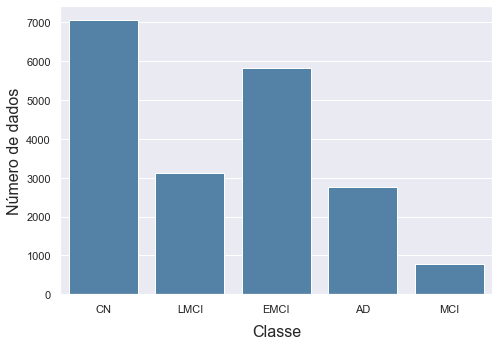

In [19]:
# original data distribution

df = load_dataframe( features_path, classes_path, classes=['AD', 'CN', 'EMCI', 'MCI', 'LMCI'] )
barplot( df, data_path+"original_distribution.pdf" )

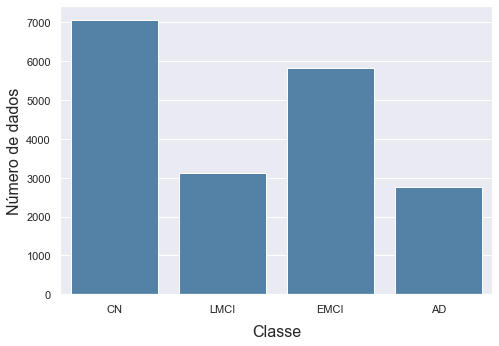

In [20]:
# new data distribution

df = load_dataframe( features_path, classes_path, classes=['AD', 'CN', 'EMCI', 'LMCI'] )
barplot( df, data_path+"new_distribution.pdf" )